In [1]:
import numpy as np
from typing import Tuple
import sys
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

sys.path.append("../")
from training.util_prediction import get_coordinate_list
from spot_detection.models.util_augment import flip

## import and display data 

In [130]:
dataset = "../data/spots_synt_harder_e4cd83b6.npz"
with np.load(dataset, allow_pickle=True) as data:
        train_x = data["x_train"]
        valid_x = data["x_valid"]
        test_x = data["x_test"]
        train_y = data["y_train"]
        valid_y = data["y_valid"]
        test_y = data["y_test"]

In [131]:
idx = 1
image = train_x[idx]
image = image[:100,:100]
mask = train_y[idx]
mask = mask[:25,:25]

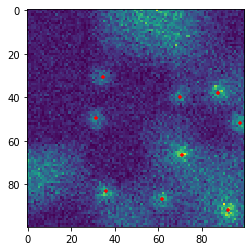

In [132]:
plt.imshow(image)
coordList = get_coordinate_list(mask,512,128)
plt.scatter(coordList[...,0],coordList[...,1],marker="+",color='r',s=20)

## Flip

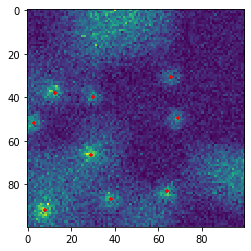

In [134]:
new_img, new_mask = flip(image,mask)
new_img1, new_mask1 = flip(new_img,new_mask)

plt.imshow(new_img)
coordList = get_coordinate_list(new_mask,512,128)
plt.scatter(coordList[...,0],coordList[...,1],marker="+",color='r',s=10)
plt.show()

In [139]:
np.sum(new_mask1==mask)

1875

In [140]:
mask.shape

(25, 25, 3)

In [141]:
25*25*3

1875